In [1]:
import pandas as pd
from datetime import datetime,time, timedelta
import numpy as np

In [2]:
pd.set_option('display.max_rows', 10)

In [3]:
column_names = ["Book time", "Reservation", "Type"]
sap_dataset = pd.read_csv("C:/Users/TheRe/Downloads/datafile.csv",names = column_names)

In [4]:
sap_dataset

,Book time,Reservation,Type
0,2022-09-10 07:28,2022-11-27 07:16,compact
1,2022-09-09 18:30,2022-10-15 18:07,class 2 truck
2,2022-09-18 15:20,2022-11-01 13:16,full-size
3,2022-10-20 18:30,2022-11-23 09:21,full-size
4,2022-10-21 14:56,2022-11-23 16:22,medium
...,...,...,...
9995,2022-09-19 07:41,2022-10-15 16:25,class 1 truck
9996,2022-10-14 12:12,2022-11-26 11:11,medium
9997,2022-11-29 17:26,2022-11-29 17:26,compact
9998,2022-09-20 12:39,2022-10-10 18:10,medium


In [5]:
sap_dataset[['Book Date', 'Book Time']] = sap_dataset['Book time'].str.split(' ', expand=True)
sap_dataset[['Reservation Date', 'Reservation Time']] = sap_dataset['Reservation'].str.split(' ', expand=True)
sap_dataset = sap_dataset.drop(['Book time', 'Reservation'], axis=1)

In [6]:
def csvSplit(df):
    df[['Book Date', 'Book Time']] = df['Book time'].str.split(' ', expand=True)
    df[['Reservation Date', 'Reservation Time']] = df['Reservation'].str.split(' ', expand=True)
    df = df.drop(['Book time', 'Reservation'], axis=1)

In [7]:
sap_dataset

,Type,Book Date,Book Time,Reservation Date,Reservation Time
0,compact,2022-09-10,07:28,2022-11-27,07:16
1,class 2 truck,2022-09-09,18:30,2022-10-15,18:07
2,full-size,2022-09-18,15:20,2022-11-01,13:16
3,full-size,2022-10-20,18:30,2022-11-23,09:21
4,medium,2022-10-21,14:56,2022-11-23,16:22
...,...,...,...,...,...
9995,class 1 truck,2022-09-19,07:41,2022-10-15,16:25
9996,medium,2022-10-14,12:12,2022-11-26,11:11
9997,compact,2022-11-29,17:26,2022-11-29,17:26
9998,medium,2022-09-20,12:39,2022-10-10,18:10


In [8]:
 def calculateRevenue(row):
    revenue = 0

    if row['Type'] == 'compact':
         revenue += 150
    elif row['Type'] == 'medium':
           revenue += 150
    elif row['Type'] == 'full-size':
        revenue += 150
    elif row['Type'] == 'class 1 truck':
        revenue += 250
    elif row['Type'] == 'class 2 truck':
        revenue += 700
            
    if row['isAccepted'] == False:
        revenue *= -1

    return revenue


In [9]:
def parse_time(time_input):
    if isinstance(time_input, str):
        return datetime.strptime(time_input, '%H:%M').time()
    elif isinstance(time_input, time):
        return time_input
    else:
        raise TypeError("Time input must be a string or a datetime.time object")


In [10]:
def parseAndSortDataFrame(df, target_day):
    # Convert date columns to datetime objects
    df['Reservation Date'] = pd.to_datetime(df['Reservation Date'])
    df['Book Date'] = pd.to_datetime(df['Book Date'])

    # Convert 'Reservation Time' from string to datetime.time
    df['Reservation Time'] = df['Reservation Time'].apply(parse_time)
    def calculate_end_time(row):
        # Combine date and time into a full datetime object
        reservation_datetime = datetime.combine(row['Reservation Date'], row['Reservation Time'])
        
        if row['Type'] == 'class 1 truck':
            end_datetime = reservation_datetime + timedelta(hours=1)
        elif row['Type'] == 'class 2 truck':
            end_datetime = reservation_datetime + timedelta(hours=2)
        else:
            end_datetime = reservation_datetime + timedelta(minutes=30)

        # Extracting only the time component for the end time
        return end_datetime.time()

    # Apply the function to calculate 'Reservation End Time'
    df['Reservation End Time'] = df.apply(calculate_end_time, axis=1)

    # Filter the DataFrame based on the specified day
    filtered_df = df[df['Reservation Date'] == pd.to_datetime(target_day)]

    # Sort the DataFrame
    sorted_df = filtered_df.sort_values(by=['Book Date', 'Book Time','Reservation Time'])

    return sorted_df

In [11]:
November1DF = parseAndSortDataFrame(sap_dataset,'2022-11-26')

In [12]:
November1DF

,Type,Book Date,Book Time,Reservation Date,Reservation Time,Reservation End Time
6251,class 1 truck,2022-09-03,07:17,2022-11-26,18:08:00,19:08:00
7438,class 1 truck,2022-09-05,07:37,2022-11-26,09:56:00,10:56:00
6035,medium,2022-09-06,07:34,2022-11-26,08:33:00,09:03:00
8351,medium,2022-09-08,15:25,2022-11-26,07:07:00,07:37:00
6104,class 1 truck,2022-09-08,18:29,2022-11-26,11:19:00,12:19:00
...,...,...,...,...,...,...
3979,full-size,2022-11-26,18:12,2022-11-26,18:27:00,18:57:00
381,compact,2022-11-26,18:16,2022-11-26,18:30:00,19:00:00
6510,class 1 truck,2022-11-26,18:25,2022-11-26,18:25:00,19:25:00
4212,full-size,2022-11-26,18:30,2022-11-26,18:30:00,19:00:00


In [13]:
# Generate time slots from 7 AM to 7 PM
def generate_time_slots(start_time, end_time, interval_minutes):
    times = []
    current_time = start_time
    while current_time <= end_time:
        times.append(current_time)
        current_time += timedelta(minutes=interval_minutes)
    return times

# Create the initial empty schedule
def create_schedule(placeholder_date):
    # Extract year, month, and day from the placeholder_date
    year = placeholder_date.year
    month = placeholder_date.month
    day = placeholder_date.day

    garage_types = ['compact', 'medium', 'full-size', 'class 1 truck', 'class 2 truck', 'Any 1', 'Any 2', 'Any 3', 'Any 4', 'Any 5']
    time_slots = generate_time_slots(datetime(year, month, day, 7, 0), datetime(year, month, day, 19, 0), 1)
    schedule = pd.DataFrame(index=time_slots, columns=garage_types)
    schedule.fillna('Available', inplace=True)

    return schedule

# Function to book a reservation
def book_reservation(schedule, garage_type, start_time_str, end_time_str, placeholder_date):
    # Parse the start and end times and combine them with the placeholder date
    start_time = datetime.combine(placeholder_date, parse_time(start_time_str))
    end_time = datetime.combine(placeholder_date, parse_time(end_time_str))

    # Check if the end time is after 7 PM
    if end_time > datetime(placeholder_date.year, placeholder_date.month, placeholder_date.day, 19, 0):
        return schedule  # Reject the reservation

    # Adjust for garage-specific or 'any' type
    if garage_type not in ['compact', 'medium', 'full-size', 'class 1 truck', 'class 2 truck']:
        garage_type = [col for col in schedule.columns if 'Any ' in col and schedule.loc[start_time:end_time, col].eq('Available').all()][0]
    
    # Mark the time slot as 'Not Available'
    schedule.loc[start_time:end_time, garage_type] = 'Not Available'
    return schedule



In [14]:
# Extracting the first reservation date from November1DF
placeholder_date = November1DF['Reservation Date'].iloc[0]

# Creating the garageSlots schedule for the first reservation date
garageSlots = create_schedule(placeholder_date)

In [15]:
garageSlots

,compact,medium,full-size,class 1 truck,class 2 truck,Any 1,Any 2,Any 3,Any 4,Any 5
2022-11-26 07:00:00,Available,Available,Available,Available,Available,Available,Available,Available,Available,Available
2022-11-26 07:01:00,Available,Available,Available,Available,Available,Available,Available,Available,Available,Available
2022-11-26 07:02:00,Available,Available,Available,Available,Available,Available,Available,Available,Available,Available
2022-11-26 07:03:00,Available,Available,Available,Available,Available,Available,Available,Available,Available,Available
2022-11-26 07:04:00,Available,Available,Available,Available,Available,Available,Available,Available,Available,Available
...,...,...,...,...,...,...,...,...,...,...
2022-11-26 18:56:00,Available,Available,Available,Available,Available,Available,Available,Available,Available,Available
2022-11-26 18:57:00,Available,Available,Available,Available,Available,Available,Available,Available,Available,Available
2022-11-26 18:58:00,Available,Available,Available,Available,Available,Available,Available,Available,Available,Available
2022-11-26 18:59:00,Available,Available,Available,Available,Available,Available,Available,Available,Available,Available


In [16]:
def book_reservations_from_df(df, garage_slots):
    def parse_time(time_str, date):
        # Combine time with the given date
        return datetime.combine(date, datetime.strptime(time_str, '%H:%M').time())

    # Initialize 'isAccepted' column to False
    df['isAccepted'] = False

    for index, row in df.iterrows():
        garage_type = row['Type']
        placeholder_date = row['Reservation Date']
        start_time_str = row['Reservation Time'].strftime('%H:%M')
        end_time_str = row['Reservation End Time'].strftime('%H:%M')
        
        # Parse the start and end times
        start_time = parse_time(start_time_str, placeholder_date)
        end_time = parse_time(end_time_str, placeholder_date)

        is_booked = False
        
        # Adjust for garage-specific or 'any' type
        if garage_type in ['compact', 'medium', 'full-size', 'class 1 truck', 'class 2 truck']:
            # Check if specific type garage is available
            if garage_slots.loc[start_time:end_time, garage_type].eq('Available').all():
                selected_garage = garage_type
                is_booked = True
            else:
                # Find an available 'Any' garage
                available_any_garages = [col for col in garage_slots.columns if 'Any ' in col]
                for any_garage in available_any_garages:
                    if garage_slots.loc[start_time:end_time, any_garage].eq('Available').all():
                        selected_garage = any_garage
                        is_booked = True
                        break

        # Mark the time slot as 'Not Available' and update 'isAccepted'
        if is_booked:
            garage_slots.loc[start_time:end_time, selected_garage] = 'Not Available' + ' ' + row['Type']
            df.at[index, 'isAccepted'] = True
            
    df['Revenue'] = df.apply(calculateRevenue, axis=1)

    return garage_slots,df

availableGarageSlots = book_reservations_from_df(November1DF, garageSlots)

In [17]:
availableGarageSlots

(                                   compact     medium  \
 2022-11-26 07:00:00  Not Available compact  Available   
 2022-11-26 07:01:00  Not Available compact  Available   
 2022-11-26 07:02:00  Not Available compact  Available   
 2022-11-26 07:03:00  Not Available compact  Available   
 2022-11-26 07:04:00  Not Available compact  Available   
 ...                                    ...        ...   
 2022-11-26 18:56:00  Not Available compact  Available   
 2022-11-26 18:57:00  Not Available compact  Available   
 2022-11-26 18:58:00  Not Available compact  Available   
 2022-11-26 18:59:00  Not Available compact  Available   
 2022-11-26 19:00:00  Not Available compact  Available   
 
                                    full-size                class 1 truck  \
 2022-11-26 07:00:00  Not Available full-size                    Available   
 2022-11-26 07:01:00  Not Available full-size                    Available   
 2022-11-26 07:02:00  Not Available full-size                    Ava

In [18]:
November1DF

,Type,Book Date,Book Time,Reservation Date,Reservation Time,Reservation End Time,isAccepted,Revenue
6251,class 1 truck,2022-09-03,07:17,2022-11-26,18:08:00,19:08:00,True,250
7438,class 1 truck,2022-09-05,07:37,2022-11-26,09:56:00,10:56:00,True,250
6035,medium,2022-09-06,07:34,2022-11-26,08:33:00,09:03:00,True,150
8351,medium,2022-09-08,15:25,2022-11-26,07:07:00,07:37:00,True,150
6104,class 1 truck,2022-09-08,18:29,2022-11-26,11:19:00,12:19:00,True,250
...,...,...,...,...,...,...,...,...
3979,full-size,2022-11-26,18:12,2022-11-26,18:27:00,18:57:00,False,-150
381,compact,2022-11-26,18:16,2022-11-26,18:30:00,19:00:00,False,-150
6510,class 1 truck,2022-11-26,18:25,2022-11-26,18:25:00,19:25:00,False,-250
4212,full-size,2022-11-26,18:30,2022-11-26,18:30:00,19:00:00,False,-150


In [19]:
total_sum = November1DF['Revenue'].sum()
print("Total sum of revenue is $" + str(total_sum))

Total sum of revenue is $-28600


In [20]:
number_of_trues = November1DF['isAccepted'].sum()
print("Number of True values in 'isAccepted':", number_of_trues)

Number of True values in 'isAccepted': 108


In [21]:
frequency_table = sap_dataset['Reservation Date'].value_counts()

# To display the frequency table
print(frequency_table)

2022-11-29    419
2022-11-30    409
2022-11-27    344
2022-11-28    333
2022-11-26    272
             ... 
2022-10-04     87
2022-10-10     86
2022-10-06     82
2022-10-07     79
2022-10-01     78
Name: Reservation Date, Length: 61, dtype: int64


In [22]:
sap_dataset['isAccepted'] = 'False'
sap_dataset['Revenue'] = 0

In [23]:
def createFullDataset(df,start_date,end_date):
    df = csvSplit(df)
    def create_schedule_for_day(start_date):
        year = start_date.year
        month = start_date.month
        day = start_date.day

        garage_types = ['compact', 'medium', 'full-size', 'class 1 truck', 'class 2 truck', 'Any 1', 'Any 2', 'Any 3', 'Any 4', 'Any 5']
        time_slots = generate_time_slots(datetime(year, month, day, 7, 0), datetime(year, month, day, 19, 0), 1)
        schedule = pd.DataFrame(index=time_slots, columns=garage_types)
        schedule.fillna('Available', inplace=True)

        return schedule

    # Initialize counters for the total accepted and rejected reservations
    total_accepted = 0
    total_rejected = 0

    # Iterate over each day in the date range
    current_date = start_date

    while current_date <= end_date:
        # Create garage slots for the current day
        daily_garage_slots = create_schedule_for_day(current_date)

        # Use parseAndSortDataFrame to get the reservations for the current day
        daily_reservations = parseAndSortDataFrame(sap_dataset, current_date)
    
        # Book reservations and update the DataFrame
        daily_garage_slots, daily_reservations = book_reservations_from_df(daily_reservations, daily_garage_slots)

        for index, row in daily_reservations.iterrows():
        # Get the index of the row in sap_dataset that matches the current row
            matching_index = df[
            (df['Reservation Date'] == df['Reservation Date']) &
            (df['Reservation Time'] == df['Reservation Time']) &
            (df['Type'] == row['Type'])].index

            # Check if there is a matching row in sap_dataset
            if not matching_index.empty:
                matching_index = matching_index[0]  # Take the first matching index

            # Update the 'isAccepted' and 'Revenue' values in sap_dataset
            df.at[matching_index, 'isAccepted'] = row['isAccepted']
            df.at[matching_index, 'Revenue'] = row['Revenue']
        
        # Count accepted and rejected reservations for the day
        accepted = daily_reservations['isAccepted'].sum()
        rejected = len(daily_reservations) - accepted

        # Update total counters
        total_accepted += accepted
        total_rejected += rejected

        # Print out daily statistics
        print(f"On {current_date.date()}, {accepted} reservations were accepted and {rejected} were rejected.")

        # Move to the next day
        current_date += timedelta(days=1)

    # Print out total statistics
    print(f"Total accepted reservations: {total_accepted}")
    print(f"Total rejected reservations: {total_rejected}")

In [24]:
def createFullDatasetFullTime(df):
    start_date = datetime(2022, 10, 1)
    end_date = datetime(2022, 11, 30)
    createFullDataset(df,start_date,end_date)

In [25]:
def create_schedule_for_day(placeholder_date):
    year = placeholder_date.year
    month = placeholder_date.month
    day = placeholder_date.day

    garage_types = ['compact', 'medium', 'full-size', 'class 1 truck', 'class 2 truck', 'Any 1', 'Any 2', 'Any 3', 'Any 4', 'Any 5']
    time_slots = generate_time_slots(datetime(year, month, day, 7, 0), datetime(year, month, day, 19, 0), 1)
    schedule = pd.DataFrame(index=time_slots, columns=garage_types)
    schedule.fillna('Available', inplace=True)

    return schedule

# Initialize counters for the total accepted and rejected reservations
total_accepted = 0
total_rejected = 0

# Iterate over each day in the date range
start_date = datetime(2022, 10, 1)
end_date = datetime(2022, 11, 30)
current_date = start_date

while current_date <= end_date:
    # Create garage slots for the current day
    daily_garage_slots = create_schedule_for_day(current_date)

    # Use parseAndSortDataFrame to get the reservations for the current day
    daily_reservations = parseAndSortDataFrame(sap_dataset, current_date)
    
    # Book reservations and update the DataFrame
    daily_garage_slots, daily_reservations = book_reservations_from_df(daily_reservations, daily_garage_slots)

    for index, row in daily_reservations.iterrows():
    # Get the index of the row in sap_dataset that matches the current row
        matching_index = sap_dataset[
        (sap_dataset['Reservation Date'] == row['Reservation Date']) &
        (sap_dataset['Reservation Time'] == row['Reservation Time']) &
        (sap_dataset['Type'] == row['Type'])].index

        # Check if there is a matching row in sap_dataset
        if not matching_index.empty:
            matching_index = matching_index[0]  # Take the first matching index

        # Update the 'isAccepted' and 'Revenue' values in sap_dataset
        sap_dataset.at[matching_index, 'isAccepted'] = row['isAccepted']
        sap_dataset.at[matching_index, 'Revenue'] = row['Revenue']
        
    # Count accepted and rejected reservations for the day
    accepted = daily_reservations['isAccepted'].sum()
    rejected = len(daily_reservations) - accepted

    # Update total counters
    total_accepted += accepted
    total_rejected += rejected

    # Print out daily statistics
    print(f"On {current_date.date()}, {accepted} reservations were accepted and {rejected} were rejected.")

    # Move to the next day
    current_date += timedelta(days=1)

# Print out total statistics
print(f"Total accepted reservations: {total_accepted}")
print(f"Total rejected reservations: {total_rejected}")

On 2022-10-01, 60 reservations were accepted and 18 were rejected.
On 2022-10-02, 64 reservations were accepted and 28 were rejected.
On 2022-10-03, 64 reservations were accepted and 28 were rejected.
On 2022-10-04, 55 reservations were accepted and 32 were rejected.
On 2022-10-05, 68 reservations were accepted and 39 were rejected.
On 2022-10-06, 56 reservations were accepted and 26 were rejected.
On 2022-10-07, 56 reservations were accepted and 23 were rejected.
On 2022-10-08, 49 reservations were accepted and 39 were rejected.
On 2022-10-09, 62 reservations were accepted and 41 were rejected.
On 2022-10-10, 60 reservations were accepted and 26 were rejected.
On 2022-10-11, 52 reservations were accepted and 39 were rejected.
On 2022-10-12, 73 reservations were accepted and 50 were rejected.
On 2022-10-13, 58 reservations were accepted and 49 were rejected.
On 2022-10-14, 59 reservations were accepted and 41 were rejected.
On 2022-10-15, 66 reservations were accepted and 48 were rejec

In [26]:
print(sap_dataset.columns)


Index(['Type', 'Book Date', 'Book Time', 'Reservation Date',
       'Reservation Time', 'Reservation End Time', 'isAccepted', 'Revenue'],
      dtype='object')


In [27]:
sap_dataset

,Type,Book Date,Book Time,Reservation Date,Reservation Time,Reservation End Time,isAccepted,Revenue
0,compact,2022-09-10,07:28,2022-11-27,07:16:00,07:46:00,True,150
1,class 2 truck,2022-09-09,18:30,2022-10-15,18:07:00,20:07:00,True,700
2,full-size,2022-09-18,15:20,2022-11-01,13:16:00,13:46:00,True,150
3,full-size,2022-10-20,18:30,2022-11-23,09:21:00,09:51:00,True,150
4,medium,2022-10-21,14:56,2022-11-23,16:22:00,16:52:00,True,150
...,...,...,...,...,...,...,...,...
9995,class 1 truck,2022-09-19,07:41,2022-10-15,16:25:00,17:25:00,True,250
9996,medium,2022-10-14,12:12,2022-11-26,11:11:00,11:41:00,False,0
9997,compact,2022-11-29,17:26,2022-11-29,17:26:00,17:56:00,False,-150
9998,medium,2022-09-20,12:39,2022-10-10,18:10:00,18:40:00,True,150


In [28]:
profit = sap_dataset[sap_dataset['Revenue'] > 0]['Revenue'].sum()

In [29]:
loss = sap_dataset[sap_dataset['Revenue'] < 0]['Revenue'].sum()

In [30]:
profit

1086600

In [31]:
loss

-1284900

In [32]:
dictionairy = pd.DataFrame(sap_dataset)

# Transform the DataFrame into a list of dictionaries
list_of_dicts = dictionairy.to_dict(orient='records')


In [33]:
def generateAvailableSlots(df, garage_slots):
    def parse_time(time_str, date):
        # Combine time with the given date
        return datetime.combine(date, datetime.strptime(time_str, '%H:%M').time())

    # Initialize 'isAccepted' column to False
    df['isAccepted'] = False

    for index, row in df.iterrows():
        garage_type = row['Type']
        placeholder_date = row['Reservation Date']
        start_time_str = row['Reservation Time'].strftime('%H:%M')
        end_time_str = row['Reservation End Time'].strftime('%H:%M')
        
        # Parse the start and end times
        start_time = parse_time(start_time_str, placeholder_date)
        end_time = parse_time(end_time_str, placeholder_date)

        is_booked = False
        
        # Adjust for garage-specific or 'any' type
        if garage_type in ['compact', 'medium', 'full-size', 'class 1 truck', 'class 2 truck']:
            # Check if specific type garage is available
            if garage_slots.loc[start_time:end_time, garage_type].eq('Available').all():
                selected_garage = garage_type
                is_booked = True
            else:
                # Find an available 'Any' garage
                available_any_garages = [col for col in garage_slots.columns if 'Any ' in col]
                for any_garage in available_any_garages:
                    if garage_slots.loc[start_time:end_time, any_garage].eq('Available').all():
                        selected_garage = any_garage
                        is_booked = True
                        break

        # Mark the time slot as 'Not Available' and update 'isAccepted'
        if is_booked:
            garage_slots.loc[start_time:end_time, selected_garage] = 'Not Available' + ' ' + row['Type']
            df.at[index, 'isAccepted'] = True
            
    df['Revenue'] = df.apply(calculateRevenue, axis=1)

    return garage_slots


In [34]:
def selectGarageDateDF(df,selectDay):
    selectDayDF = parseAndSortDataFrame(df, selectDay)
    placeholder_date = selectDayDF['Reservation Date'].iloc[0]
    garageSlots = create_schedule(placeholder_date)
  ##  newGarageSlots = book_reservations_from_df(selectDayDF, garageSlots)
    finalGarageSlots = generateAvailableSlots(selectDayDF, garageSlots)
    return finalGarageSlots

In [35]:
November1Garage = selectGarageDateDF(sap_dataset,'2022-11-01')
November1Garage

,compact,medium,full-size,class 1 truck,class 2 truck,Any 1,Any 2,Any 3,Any 4,Any 5
2022-11-01 07:00:00,Available,Available,Available,Available,Available,Available,Available,Available,Available,Not Available medium
2022-11-01 07:01:00,Available,Available,Available,Available,Available,Available,Available,Available,Available,Not Available medium
2022-11-01 07:02:00,Available,Available,Available,Available,Available,Available,Available,Not Available medium,Available,Not Available medium
2022-11-01 07:03:00,Available,Available,Available,Available,Available,Available,Available,Not Available medium,Available,Not Available medium
2022-11-01 07:04:00,Available,Available,Available,Available,Not Available class 2 truck,Available,Available,Not Available medium,Available,Not Available medium
...,...,...,...,...,...,...,...,...,...,...
2022-11-01 18:56:00,Available,Available,Not Available full-size,Not Available class 1 truck,Not Available class 2 truck,Not Available class 2 truck,Not Available class 2 truck,Not Available class 1 truck,Not Available class 1 truck,Not Available class 1 truck
2022-11-01 18:57:00,Available,Available,Not Available full-size,Not Available class 1 truck,Not Available class 2 truck,Not Available class 2 truck,Not Available class 2 truck,Not Available class 1 truck,Not Available class 1 truck,Not Available class 1 truck
2022-11-01 18:58:00,Available,Available,Not Available full-size,Not Available class 1 truck,Not Available class 2 truck,Not Available class 2 truck,Not Available class 2 truck,Not Available class 1 truck,Not Available class 1 truck,Not Available class 1 truck
2022-11-01 18:59:00,Available,Available,Not Available full-size,Not Available class 1 truck,Not Available class 2 truck,Not Available class 2 truck,Not Available class 2 truck,Not Available class 1 truck,Not Available class 1 truck,Not Available class 1 truck


In [36]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [37]:
def createPlot(df, selectDay):
    # Convert the time index to datetime
    df.index = pd.to_datetime(df.index)

    # Define color mapping for car types
    color_map = {
        'compact': 'red',
        'medium': 'blue',
        'full-size': 'yellow',
        'class 1 truck': 'green',
        'class 2 truck': 'purple'
    }

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(12, 6))

    # Filter the dataframe to select data for the given day
    df_selectDay = df[df['Reservation Date'] == selectDay]

    # Iterate through each row in the dataframe
    for _, row in df_selectDay.iterrows():
        reservation_time = row.name  # Get the reservation time from the index
        any_occupancy = {}  # Dictionary to store occupancy of 'Any' garages
        
        # Iterate through each garage type in the row
        for garage_type in df.columns:
            if 'Any' in garage_type:
                # If it's an 'Any' garage, check if it's occupied
                if row[garage_type] != 'Available':
                    # Determine the color based on the car type
                    car_type = row[garage_type].split()[-1]  # Extract the car type from the occupancy
                    color = color_map.get(car_type, 'white')  # Default to 'white' if not found in color_map
                    any_occupancy[garage_type] = color  # Store the color in the dictionary
        
        # Plot bars for 'Any' garages with labels
        for garage_type, color in any_occupancy.items():
            ax.bar(reservation_time, 1, bottom=0, width=pd.Timedelta(minutes=1), color=color, label=f'{garage_type} ({car_type})')

    # Set x-axis limits to represent 7am to 7pm
    date_str = selectDay
    date = pd.to_datetime(date_str).date()
    ax.set_xlim(pd.Timestamp(f'{date} 07:00:00'), pd.Timestamp(f'{date} 19:00:00'))

    # Format x-axis labels
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Set y-axis labels and title
    ax.set_yticks([])
    ax.set_ylabel("Garage Types")
    ax.set_title("Garage Occupancy by Car Type")

    # Add a legend
    ax.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()


In [38]:
def createPlot(df, selectDay):
    # Convert the time index to datetime
    df.index = pd.to_datetime(df.index)

    # Define color mapping for car types
    color_map = {
        'compact': 'red',
        'medium': 'blue',
        'full-size': 'yellow',
        'class 1 truck': 'green',
        'class 2 truck': 'purple'
    }

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(12, 6))

    # Filter the dataframe to select data for the given day
    df_selectDay = df[df.index.date == pd.to_datetime(selectDay).date()]

    # Extract unique car types for legend
    unique_car_types = set()
    
    # Iterate through each row in the dataframe
    for _, row in df_selectDay.iterrows():
        reservation_time = row.name  # Get the reservation time from the index
        
        # Iterate through each garage type in the row
        for garage_type, occupancy in row.iteritems():
            if occupancy != 'Available':
                # Determine the color based on the car type
                car_type = occupancy.split()[-1]  # Extract the car type from the occupancy
                color = color_map.get(car_type, 'white')  # Default to 'white' if not found in color_map
                
                # Plot a bar for the garage type with the determined color
                ax.bar(reservation_time.strftime("%H:%M"), 1, bottom=0, width=pd.Timedelta(minutes=1), color=color, label=f'{garage_type} ({car_type})')
                
                # Add car type to unique_car_types
                unique_car_types.add(car_type)

    # Print information for debugging (outside of the loop)
    print(f"Unique Car Types: {unique_car_types}")

    # Set x-axis limits to represent 7am to 7pm
    date_str = selectDay
    date = pd.to_datetime(date_str).date()
    ax.set_xlim(pd.Timestamp(f'{date} 07:00:00'), pd.Timestamp(f'{date} 19:00:00'))

    # Format x-axis labels
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Set y-axis labels and title
    ax.set_yticks([])
    ax.set_ylabel("Garage Types")
    ax.set_title("Garage Occupancy by Car Type")

    # Create a legend using unique car types
    legend_labels = [f'{car_type}' for car_type in unique_car_types]
    ax.legend(labels=legend_labels, loc='upper right')

    # Show the plot
    plt.tight_layout()
    plt.show()

In [39]:
def createPlot(df, selectDay):
    # Convert the time index to datetime
    df.index = pd.to_datetime(df.index)

    # Define color mapping for car types
    color_map = {
        'compact': 'red',
        'medium': 'blue',
        'full-size': 'yellow',
        'class 1 truck': 'green',
        'class 2 truck': 'purple'
    }

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(12, 6))

    # Filter the dataframe to select data for the given day
    df_selectDay = df[df.index.date == pd.to_datetime(selectDay).date()]

    # Extract unique car types for legend
    unique_car_types = set()
    
    # Iterate through each row in the dataframe
    for _, row in df_selectDay.iterrows():
        reservation_time = row.name  # Get the reservation time from the index
        
        # Iterate through each garage type in the row
        for garage_type, occupancy in row.iteritems():
            if occupancy != 'Available':
                # Split the occupancy string into parts
                parts = occupancy.split()
                if len(parts) >= 3:
                    car_type = parts[-2]  # Extract the car type from the occupancy
                    color = color_map.get(car_type, 'white')  # Default to 'white' if not found in color_map
                    
                    # Plot a bar for the garage type with the determined color
                    ax.bar(reservation_time.strftime("%H:%M"), 1, bottom=0, width=pd.Timedelta(minutes=1), color=color, label=f'{garage_type} ({car_type})')
                    
                    # Add car type to unique_car_types
                    unique_car_types.add(car_type)

    # Print information for debugging (outside of the loop)
    print(f"Unique Car Types: {unique_car_types}")

    # Set x-axis limits to represent 7am to 7pm
    date_str = selectDay
    date = pd.to_datetime(date_str).date()
    ax.set_xlim(pd.Timestamp(f'{date} 07:00:00'), pd.Timestamp(f'{date} 19:00:00'))

    # Format x-axis labels
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Set y-axis labels and title
    ax.set_yticks([])
    ax.set_ylabel("Garage Types")
    ax.set_title("Garage Occupancy by Car Type")

    # Create a legend using unique car types
    legend_labels = [f'{car_type}' for car_type in unique_car_types]
    ax.legend(labels=legend_labels, loc='upper right')

    # Show the plot
    plt.tight_layout()
    plt.show()

In [40]:
def createHistogramPlot(df, selectDay):
    # Define color mapping for car types
    color_map = {
        'compact': 'red',
        'medium': 'blue',
        'full-size': 'yellow',
        'class 1 truck': 'green',
        'class 2 truck': 'purple',
        'Any': 'grey'  # Color for 'Any' type garages
    }

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(12, 8))

    # Filter the dataframe to select data for the given day
    df_selectDay = df[df.index.date == pd.to_datetime(selectDay).date()]

    # Garage types
    garage_types = df.columns

    # Mapping each garage to a y-axis value
    y_values = {garage: i for i, garage in enumerate(garage_types)}

    # Iterate through each row in the dataframe
    for _, row in df_selectDay.iterrows():
        reservation_time = row.name  # Get the reservation time from the index

        # Iterate through each garage type in the row
        for garage_type, occupancy in row.iteritems():
            if occupancy != 'Available':
                # Split the occupancy string into parts
                car_type= occupancy[-1]
                color = color_map.get(car_type, 'white')  # Default to 'white' if not found in color_map
                
                # Plot a bar for the garage type with the determined color
                ax.bar(reservation_time, 0.8, bottom=y_values[garage_type], color=color, align='center')

    # Set the y-axis to show garage types
    ax.set_yticks(range(len(garage_types)))
    ax.set_yticklabels(garage_types)

    # Set x-axis limits to represent 7am to 7pm
    date_str = selectDay
    date = pd.to_datetime(date_str).date()
    ax.set_xlim(pd.Timestamp(f'{date} 07:00:00'), pd.Timestamp(f'{date} 19:00:00'))

    # Format x-axis labels
    ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=5))  # Use a 5-minute interval for clarity
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Set axis labels and title
    ax.set_xlabel("Time")
    ax.set_ylabel("Garage Types")
    ax.set_title("Garage Occupancy by Car Type")

    # Create a legend using the color map
    legend_labels = [f'{car_type} ({color})' for car_type, color in color_map.items()]
    ax.legend(labels=legend_labels, loc='upper right', title="Car Types")

    # Show the plot
    plt.tight_layout()
    plt.show()


Unique Car Types: set()


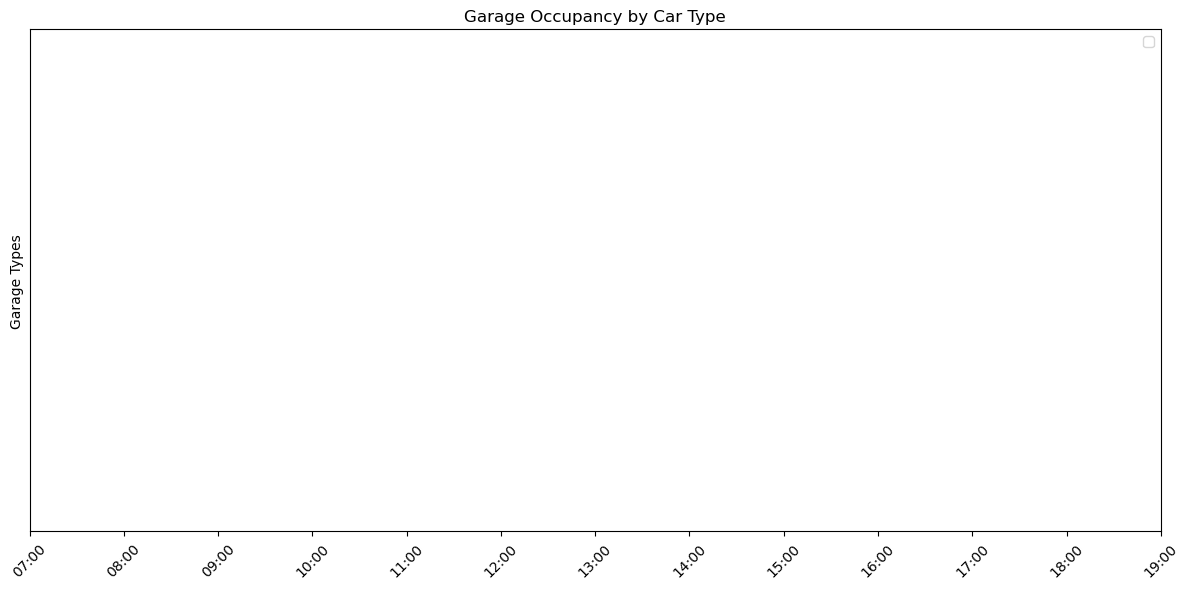

In [41]:
createPlot(sap_dataset,'2022-11-01')

In [42]:
def createHistogramPlotV2(df, selectDay):
    df =selectGarageDateDF(df,selectDay)
    # Define color mapping for car types
    color_map = {
        'compact': 'red',
        'medium': 'blue',
        'full-size': 'yellow',
        'class 1 truck': 'green',
        'class 2 truck': 'purple',
        'Any': 'grey'  # Color for 'Any' type garages
    }

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(12, 8))

    # Filter the dataframe to select data for the given day
    df_selectDay = df[df.index.date == pd.to_datetime(selectDay).date()]

    # Garage types
    garage_types = df.columns

    # Mapping each garage to a y-axis value
    y_values = {garage: i for i, garage in enumerate(garage_types)}

    # Iterate through each row in the dataframe
    for garage_type, occupancy in row.iteritems():
            if occupancy != 'Available':
                # Split the occupancy string into parts
                parts = occupancy.split()
                car_type = parts[-2] if len(parts) >= 3 else 'Any'
                color = color_map.get(car_type, 'white')  # Default to 'white' if not found in color_map
                
                # Plot a bar for the garage type with the determined color
                ax.bar(reservation_time, 0.8, bottom=y_values[garage_type], color=color, align='center')


    # Set the y-axis to show garage types
    ax.set_yticks(range(len(garage_types)))
    ax.set_yticklabels(garage_types)

    # Set x-axis limits to represent 7am to 7pm
    date_str = selectDay
    date = pd.to_datetime(date_str).date()
    ax.set_xlim(pd.Timestamp(f'{date} 07:00:00'), pd.Timestamp(f'{date} 19:00:00'))

    # Format x-axis labels to display every 30 minutes
    ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=30))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Set axis labels and title
    ax.set_xlabel("Time")
    ax.set_ylabel("Garage Types")
    ax.set_title("Garage Occupancy by Car Type")

    # Create a legend using the color map
    legend_labels = [f'{car_type} ({color})' for car_type, color in color_map.items()]
    ax.legend(labels=legend_labels, loc='upper right', title="Car Types")

    # Show the plot
    plt.tight_layout()
    plt.show()

C:\Users\TheRe\AppData\Local\Temp\ipykernel_28660\1990055781.py:26: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for garage_type, occupancy in row.iteritems():


NameError: name 'reservation_time' is not defined

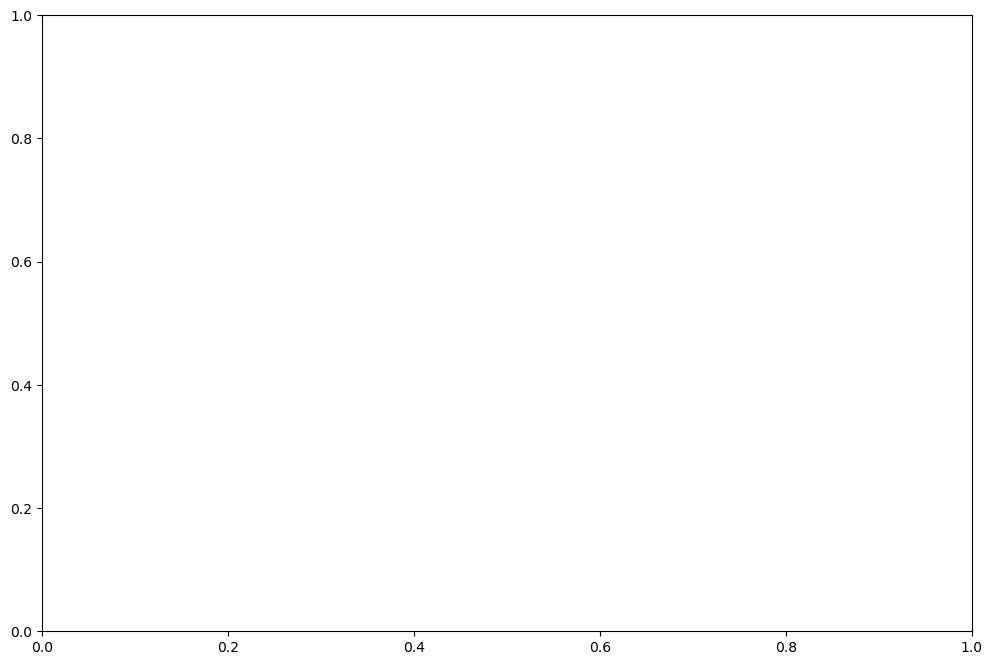

In [43]:
createHistogramPlotV2(sap_dataset,'2022-11-01')